# Classify kết quả passed/ko passed dựa trên điểm quá trình

In [16]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("drive/MyDrive/BDC_ASS/data.csv")
df1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,NHHK,MAMH,TENMHVN,MANH,F_TO,F_MAKH,F_TENLOP,F_MANG,F_TENNGVN,...,TILEBT,BTLDA,TILEBTLDA,TN,TILETN,THI,TILETHI,TKET,F_DIEM1,F_DIEM2
0,0,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,3.0,60.0,4.0,0.0,0.0
1,1,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,5.0,60.0,6.0,0.0,0.0
2,2,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,8.5,60.0,8.5,0.0,0.0
3,3,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,4.0,60.0,4.0,0.0,0.0
4,4,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,9.5,60.0,9.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470304,470304,162,CO1003,Nhập môn về lập trình,L06,A,XD,XD16KT,KTR,Kiến Trúc,...,0.0,7.5,30.0,10.0,30.0,2.0,40.0,2.0,0.0,0.0
470305,470305,162,CO1003,Nhập môn về lập trình,L06,A,XD,XD16KT,KTR,Kiến Trúc,...,0.0,8.5,30.0,10.0,30.0,5.5,40.0,8.0,0.0,0.0
470306,470306,162,CO1003,Nhập môn về lập trình,L06,A,XD,XD16KT,KTR,Kiến Trúc,...,0.0,8.5,30.0,9.0,30.0,3.0,40.0,6.5,0.0,0.0
470307,470307,162,CO1003,Nhập môn về lập trình,L06,A,XD,XD16KT,KTR,Kiến Trúc,...,0.0,7.5,30.0,9.0,30.0,2.5,40.0,2.5,0.0,0.0


In [17]:
df1.columns

Index(['Unnamed: 0', 'NHHK', 'MAMH', 'TENMHVN', 'MANH', 'F_TO', 'F_MAKH',
       'F_TENLOP', 'F_MANG', 'F_TENNGVN', 'MASV', 'F_HOLOTVN', 'F_TENVN', 'KT',
       'TILEKT', 'BT', 'TILEBT', 'BTLDA', 'TILEBTLDA', 'TN', 'TILETN', 'THI',
       'TILETHI', 'TKET', 'F_DIEM1', 'F_DIEM2'],
      dtype='object')

In [18]:
df = df1[["MAMH","F_TO","F_MAKH",'F_TENLOP','F_MANG',\
       'KT','BT', 'BTLDA', 'TN', 'THI',\
       'TKET', 'F_DIEM1', 'F_DIEM2']].copy()
df.MAMH = df.MAMH.astype(str)
df

,MAMH,F_TO,F_MAKH,F_TENLOP,F_MANG,KT,BT,BTLDA,TN,THI,TKET,F_DIEM1,F_DIEM2
0,1001,A,CK,CK13CK02,CKI,6.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0
1,1001,A,CK,CK13CK02,CKI,7.5,0.0,0.0,0.0,5.0,6.0,0.0,0.0
2,1001,A,CK,CK13CK05,CKI,8.5,0.0,0.0,0.0,8.5,8.5,0.0,0.0
3,1001,A,CK,CK13CK05,CKI,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
4,1001,A,CK,CK13CK05,CKI,9.0,0.0,0.0,0.0,9.5,9.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470304,CO1003,A,XD,XD16KT,KTR,0.0,0.0,7.5,10.0,2.0,2.0,0.0,0.0
470305,CO1003,A,XD,XD16KT,KTR,0.0,0.0,8.5,10.0,5.5,8.0,0.0,0.0
470306,CO1003,A,XD,XD16KT,KTR,0.0,0.0,8.5,9.0,3.0,6.5,0.0,0.0
470307,CO1003,A,XD,XD16KT,KTR,0.0,0.0,7.5,9.0,2.5,2.5,0.0,0.0


In [19]:
passed = []
for i in range(len(df)):
  student = df.iloc[i]
  if((student.TKET < 5) | (student.THI <= 3)):
    passed.append(0)
  else:
    passed.append(1)
df['passed'] = passed
df

,MAMH,F_TO,F_MAKH,F_TENLOP,F_MANG,KT,BT,BTLDA,TN,THI,TKET,F_DIEM1,F_DIEM2,passed
0,1001,A,CK,CK13CK02,CKI,6.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0
1,1001,A,CK,CK13CK02,CKI,7.5,0.0,0.0,0.0,5.0,6.0,0.0,0.0,1
2,1001,A,CK,CK13CK05,CKI,8.5,0.0,0.0,0.0,8.5,8.5,0.0,0.0,1
3,1001,A,CK,CK13CK05,CKI,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0
4,1001,A,CK,CK13CK05,CKI,9.0,0.0,0.0,0.0,9.5,9.5,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470304,CO1003,A,XD,XD16KT,KTR,0.0,0.0,7.5,10.0,2.0,2.0,0.0,0.0,0
470305,CO1003,A,XD,XD16KT,KTR,0.0,0.0,8.5,10.0,5.5,8.0,0.0,0.0,1
470306,CO1003,A,XD,XD16KT,KTR,0.0,0.0,8.5,9.0,3.0,6.5,0.0,0.0,0
470307,CO1003,A,XD,XD16KT,KTR,0.0,0.0,7.5,9.0,2.5,2.5,0.0,0.0,0


In [20]:
p = df.passed.sum()
print("Passed: {}".format(p))
print("Failed: {}.".format(len(df)-p))

Passed: 354523
Failed: 115786.


In [21]:
del df['THI']
del df['TKET']

# Extract feature columns
feature_cols = list(df.columns[:-1])

# Extract target column 'passed'
target_col = df.columns[-1] 

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = df[feature_cols]
y_all = df[target_col]


In [22]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (3822 total features):
['MAMH_1001', 'MAMH_1004', 'MAMH_1025', 'MAMH_200029', 'MAMH_200036', 'MAMH_200037', 'MAMH_200064', 'MAMH_201001', 'MAMH_201002', 'MAMH_201010', 'MAMH_201021', 'MAMH_201023', 'MAMH_201024', 'MAMH_201026', 'MAMH_201027', 'MAMH_201029', 'MAMH_201030', 'MAMH_201031', 'MAMH_201032', 'MAMH_201033', 'MAMH_201035', 'MAMH_201036', 'MAMH_201037', 'MAMH_201039', 'MAMH_201040', 'MAMH_201043', 'MAMH_201302', 'MAMH_201303', 'MAMH_201701', 'MAMH_201702', 'MAMH_201703', 'MAMH_201704', 'MAMH_201705', 'MAMH_201706', 'MAMH_201707', 'MAMH_201708', 'MAMH_202001', 'MAMH_202002', 'MAMH_202007', 'MAMH_202009', 'MAMH_202010', 'MAMH_202013', 'MAMH_202038', 'MAMH_202042', 'MAMH_202047', 'MAMH_202080', 'MAMH_202083', 'MAMH_202084', 'MAMH_202087', 'MAMH_202103', 'MAMH_202104', 'MAMH_202118', 'MAMH_202302', 'MAMH_202303', 'MAMH_202701', 'MAMH_202702', 'MAMH_202703', 'MAMH_202704', 'MAMH_203001', 'MAMH_203003', 'MAMH_203005', 'MAMH_203006', 'MAMH_203008', 'MAMH_20300

In [23]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
#future reference: Stratified Shuffle Split is preferred unbalanced data because it preserves the % of samples for each class
# TODO: Set the number of training points
size = 100000
num_train = int(size*0.7)

# Set the number of testing points
num_test = size - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, train_size=num_train, random_state=125)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 70000 samples.
Testing set has 30000 samples.


In [24]:
X_train.columns

Index(['MAMH_1001', 'MAMH_1004', 'MAMH_1025', 'MAMH_200029', 'MAMH_200036',
       'MAMH_200037', 'MAMH_200064', 'MAMH_201001', 'MAMH_201002',
       'MAMH_201010',
       ...
       'F_MANG_XN2', 'F_MANG_XQG', 'F_MANG_XTN', 'F_MANG_YS2', 'KT', 'BT',
       'BTLDA', 'TN', 'F_DIEM1', 'F_DIEM2'],
      dtype='object', length=3822)

# Mô Hình dự đoán

## Về F1 score: 
https://caihuuthuc.wordpress.com/2020/02/23/precision-recall-va-f1-score-la-gi/

In [10]:
from time import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label=1),accuracy_score(target.values, y_pred)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1_train, acc_train = predict_labels(clf, X_train, y_train)
    f1_test, acc_test = predict_labels(clf, X_test, y_test)
    print("====TRAIN====")
    print ("F1 score for training set: {:.4f}.".format(f1_train))
    print ("Accuaracy for training set: {:.4f}.".format(acc_train))
    print("====TEST====")
    print ("F1 score for test set: {:.4f}.".format(f1_test))
    print ("Accuaracy for test set: {:.4f}.".format(acc_test))
    print("-------------------------------------------------")

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state = 35)
clf_B = RandomForestClassifier(random_state = 35)

t_size = 10000
# TODO: Set up the training set sizes
X_train_10000 = X_train[:t_size]
y_train_10000 = y_train[:t_size]

X_train_20000 = X_train[:t_size*2]
y_train_20000 = y_train[:t_size*2]

X_train_30000 = X_train[:t_size*3]
y_train_30000 = y_train[:t_size*3]

for clf in [clf_A, clf_B]:
    #future reference: use a for loop on code below instead of typing it all out
    for train in [(X_train_10000, y_train_10000), (X_train_20000, y_train_20000), (X_train_30000, y_train_30000)]:
        train_predict(clf, train[0], train[1], X_test, y_test)
        print

Training a DecisionTreeClassifier using a training set size of 10000. . .
Trained model in 2.6911 seconds
Made predictions in 0.1377 seconds.
Made predictions in 0.3566 seconds.
====TRAIN====
F1 score for training set: 0.9960.
Accuaracy for training set: 0.9940.
====TEST====
F1 score for test set: 0.8853.
Accuaracy for test set: 0.8254.
-------------------------------------------------
Training a DecisionTreeClassifier using a training set size of 20000. . .
Trained model in 9.5705 seconds
Made predictions in 0.2505 seconds.
Made predictions in 0.3547 seconds.
====TRAIN====
F1 score for training set: 0.9932.
Accuaracy for training set: 0.9899.
====TEST====
F1 score for test set: 0.8902.
Accuaracy for test set: 0.8325.
-------------------------------------------------
Training a DecisionTreeClassifier using a training set size of 30000. . .
Trained model in 14.0593 seconds
Made predictions in 0.3560 seconds.
Made predictions in 0.3491 seconds.
====TRAIN====
F1 score for training set: 0.

In [12]:
train_predict(clf_A, X_train, y_train, X_test, y_test)

Training a DecisionTreeClassifier using a training set size of 70000. . .
Trained model in 63.6545 seconds
Made predictions in 0.8104 seconds.
Made predictions in 0.3571 seconds.
====TRAIN====
F1 score for training set: 0.9871.
Accuaracy for training set: 0.9805.
====TEST====
F1 score for test set: 0.9003.
Accuaracy for test set: 0.8478.
-------------------------------------------------


In [13]:
train_predict(clf_B, X_train, y_train, X_test, y_test)

Training a RandomForestClassifier using a training set size of 70000. . .
Trained model in 201.1062 seconds
Made predictions in 7.3819 seconds.
Made predictions in 3.2847 seconds.
====TRAIN====
F1 score for training set: 0.9872.
Accuaracy for training set: 0.9805.
====TEST====
F1 score for test set: 0.9164.
Accuaracy for test set: 0.8694.
-------------------------------------------------


#Export model Weight


In [14]:
from sklearn.ensemble import RandomForestClassifier
clf_B = RandomForestClassifier(random_state=35)
model = clf_B.fit(X_train, y_train)

In [15]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_4436 <= 0.25
|   |--- feature_4431 <= 6.02
|   |   |--- feature_4432 <= 5.72
|   |   |   |--- feature_2856 <= 0.50
|   |   |   |   |--- feature_4434 <= 6.28
|   |   |   |   |   |--- feature_4431 <= 3.90
|   |   |   |   |   |   |--- feature_4433 <= 5.65
|   |   |   |   |   |   |   |--- feature_4415 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_483 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_2152 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_885 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 28
|   |   |   |   |   |   |   |   |   |   |--- feature_885 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_2152 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_483 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_2886 <= 0.50
|   |   |   |   |   |   |   |   |   |   |

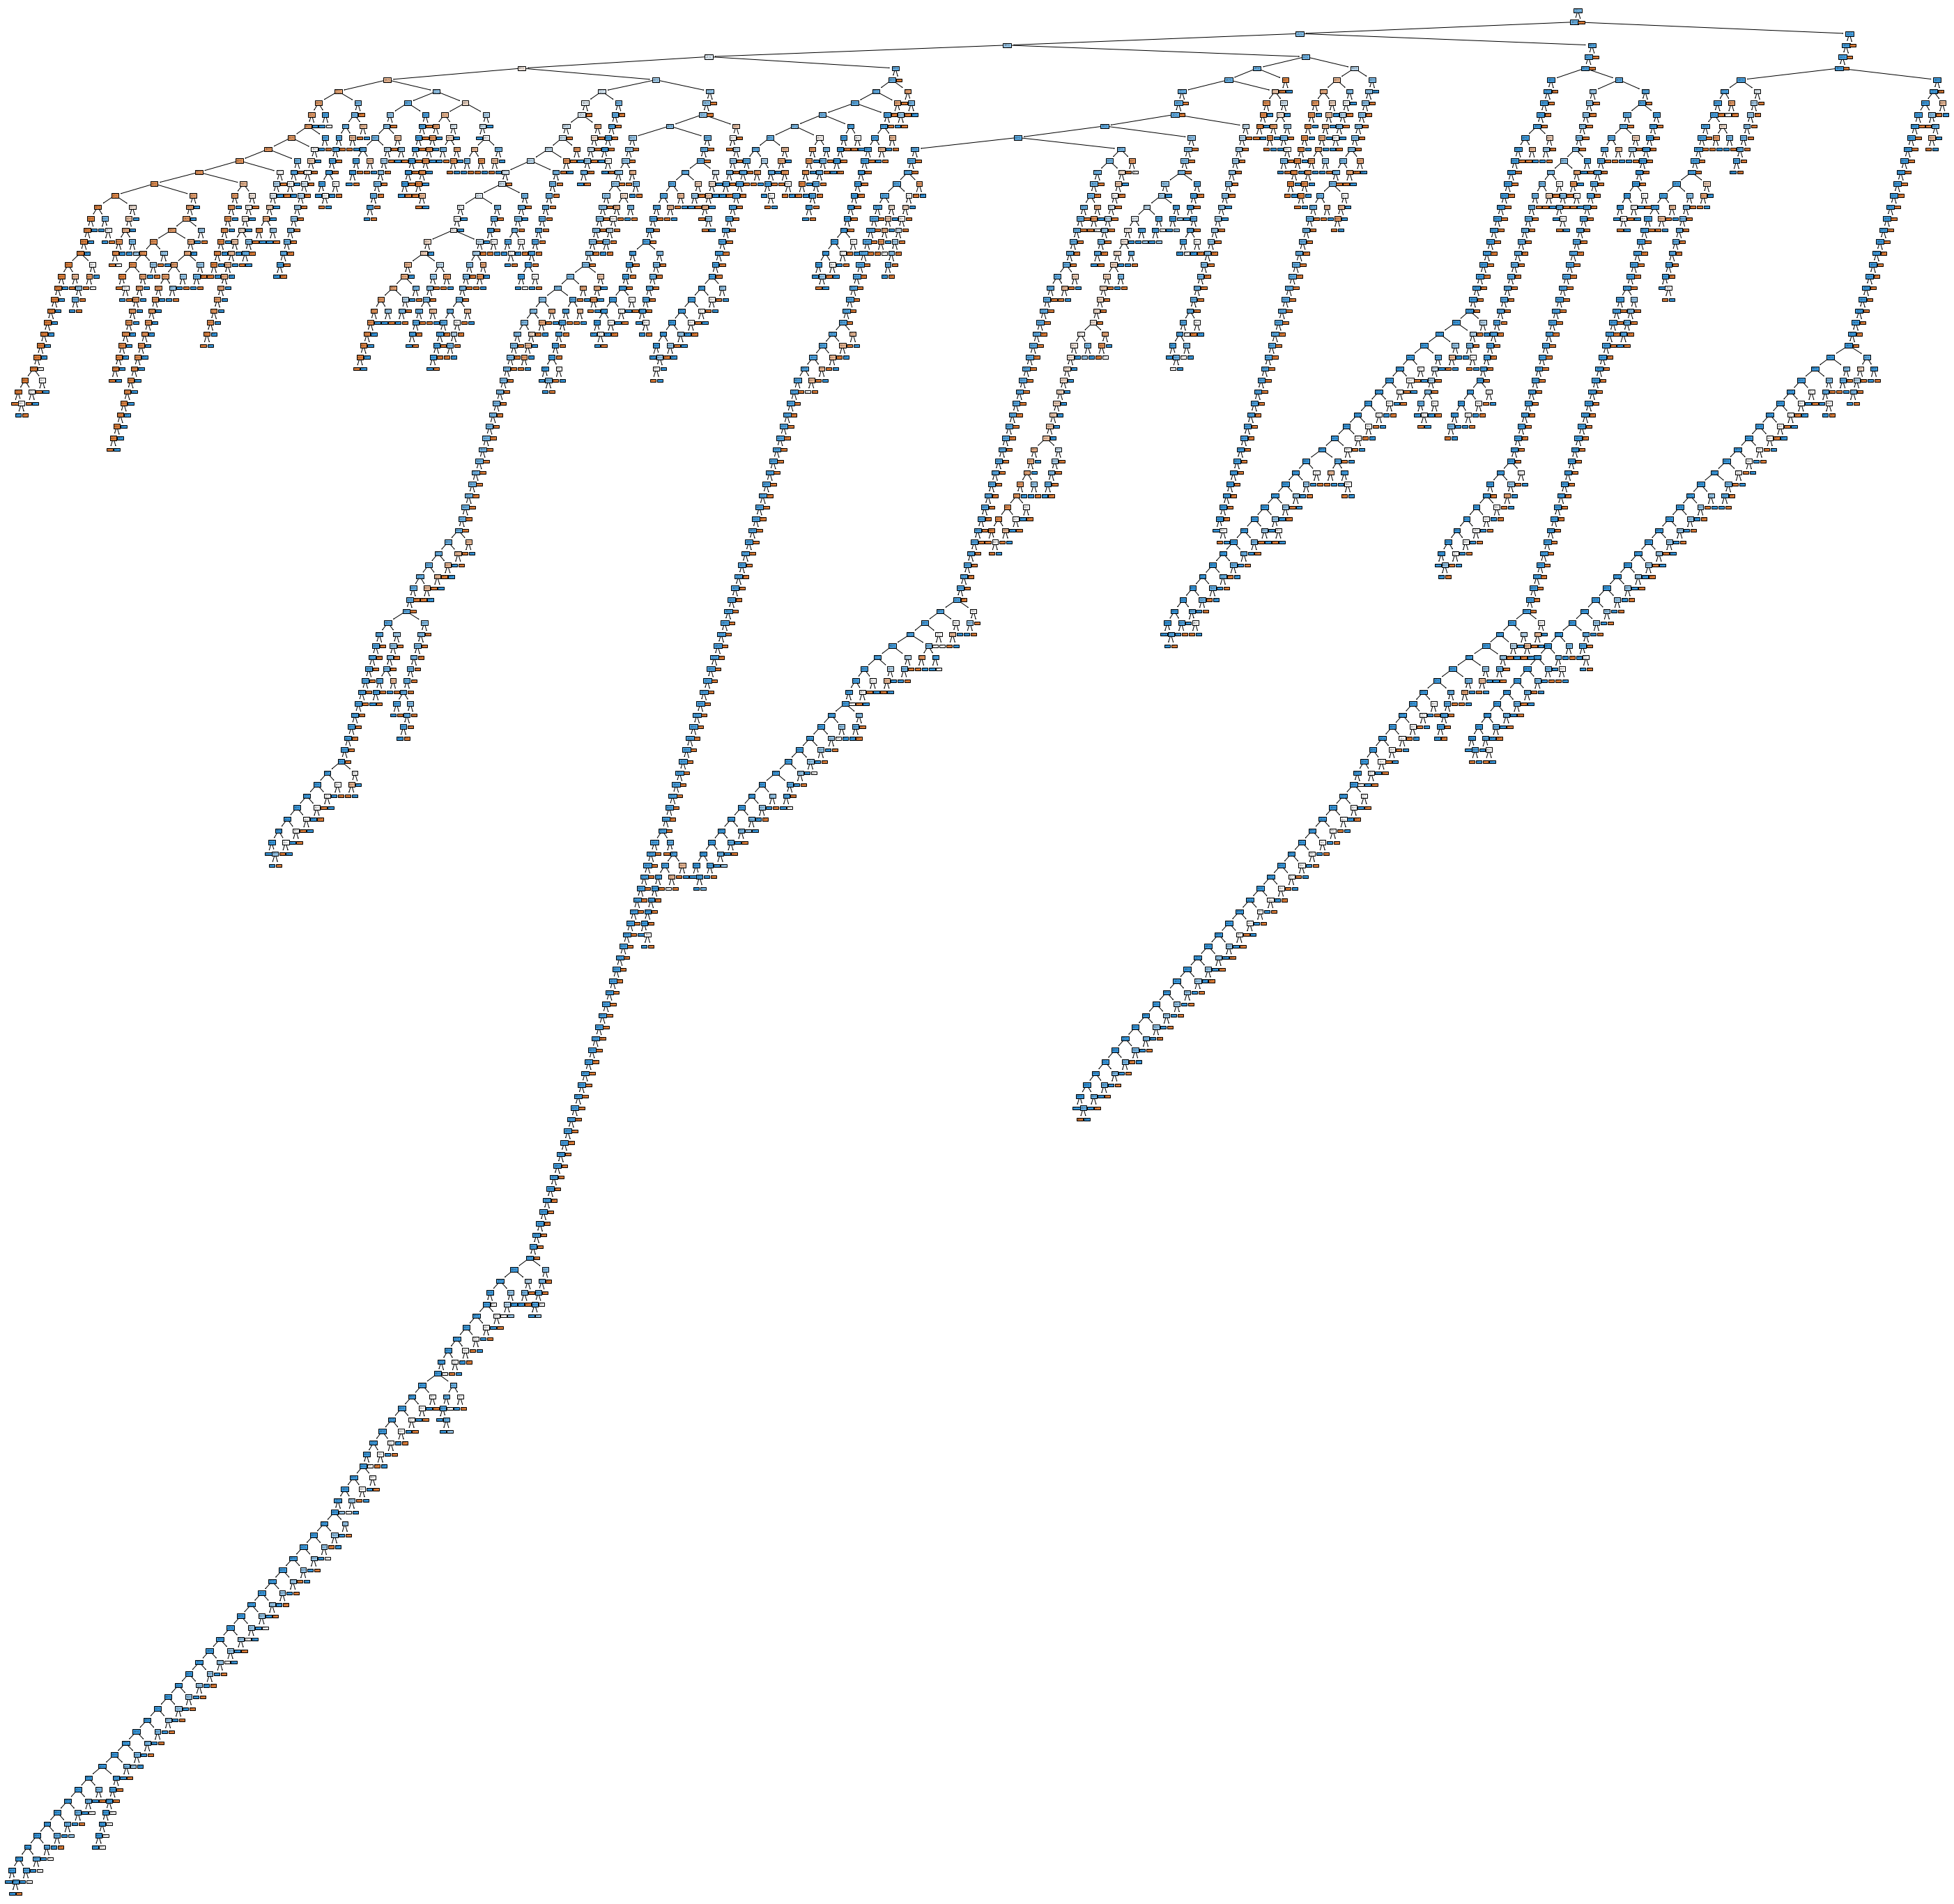

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(model,filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 35)
train_predict(clf, X_train, y_train, X_test, y_test)

Training a RandomForestClassifier using a training set size of 70000. . .
Trained model in 257.8710 seconds
Made predictions in 9.2963 seconds.
Made predictions in 4.8441 seconds.
====TRAIN====
F1 score for training set: 0.9879.
Accuaracy for training set: 0.9816.
====TEST====
F1 score for test set: 0.9168.
Accuaracy for test set: 0.8699.
-------------------------------------------------
